## **Análisis Exploratorio de Datos (EDA): Negocio de Ventas**

### Autor: Isabela Toledo Balcázar

### Marzo 2024

### A) Tabla "Sales"

In [2]:
# Importar librerias necesarias
import openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Carga de datos

In [3]:
# Cargar datos a un Dataframe
dataset_path = "202403-Summan-PruebaTécnica-AnalistaDatos.xlsx"
df = pd.read_excel(dataset_path)

2. Exploración inicial

In [4]:
# Inspeccionar el dataset
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Country/Region,City,State/Province,Postal_Code,Region,Product_ID,Sales,Quantity,Discount,Profit
0,1,US-2020-103800,2020-01-03,2020-01-07,Standard Class,DP-13000,United States,Houston,Texas,77095,Central,OFF-PA-10000174,16.448,2,0.2,5.5512
1,2,US-2020-112326,2020-01-04,2020-01-08,Standard Class,PO-19195,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,3.54,2,0.8,-5.487
2,3,US-2020-112326,2020-01-04,2020-01-08,Standard Class,PO-19195,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,11.784,3,0.2,4.2717
3,4,US-2020-112326,2020-01-04,2020-01-08,Standard Class,PO-19195,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,272.736,3,0.2,-64.7748
4,5,US-2020-141817,2020-01-05,2020-01-12,Standard Class,MB-18085,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,19.536,3,0.2,4.884


In [5]:
# Obtener descripción de la estructura e información básica del contenido del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11742 entries, 0 to 11741
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row_ID          11742 non-null  int64         
 1   Order_ID        11742 non-null  object        
 2   Order_Date      11742 non-null  datetime64[ns]
 3   Ship_Date       11742 non-null  datetime64[ns]
 4   Ship_Mode       11742 non-null  object        
 5   Customer_ID     11742 non-null  object        
 6   Country/Region  11671 non-null  object        
 7   City            11742 non-null  object        
 8   State/Province  11742 non-null  object        
 9   Postal_Code     11742 non-null  object        
 10  Region          11742 non-null  object        
 11  Product_ID      11742 non-null  object        
 12  Sales           11742 non-null  object        
 13  Quantity        11742 non-null  int64         
 14  Discount        11742 non-null  float64       
 15  Pr

* El dataset tiene 11742 filas y 16 columnas
* Se observa inicialmente que hay datos nulos en la columna "Country/Region"
* Columnas como "Sales" y "Profit" deberían ser de tipo numérico

3. Limpieza de datos

* Remover duplicados

In [6]:
# Chequear si hay valores duplicados
print("Filas duplicadas:", df.duplicated().sum())

Filas duplicadas: 1547


In [7]:
# Remover duplicados
df.drop_duplicates(inplace=True)
print('Filas duplicadas:', df.duplicated().sum())
df.shape

Filas duplicadas: 0


(10195, 16)

* Manejo de datos faltantes

In [8]:
# Chequear si hay valores faltantes
df.isnull().sum().sort_values(ascending = False)

Country/Region    63
Row_ID             0
Order_ID           0
Order_Date         0
Ship_Date          0
Ship_Mode          0
Customer_ID        0
City               0
State/Province     0
Postal_Code        0
Region             0
Product_ID         0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64

In [9]:
# Extraigo un subset del df para ver las filas nulas de la columna "Country/Region" más su correspondiente "Order_ID"
# Para llenar valores faltantes de acuerdo a los valores de la columna "Order_ID"
filas_pais_nulo = df[df["Country/Region"].isnull()]
subset_df = filas_pais_nulo[["Country/Region", "Order_ID"]]
print(subset_df)

      Country/Region        Order_ID
68               NaN  US-2020-110422
318              NaN  US-2020-101770
392              NaN  US-2020-102715
393              NaN  US-2020-102715
395              NaN  US-2020-102715
...              ...             ...
10196            NaN  US-2023-144694
10206            NaN  US-2023-144694
10723            NaN  US-2023-161130
11196            NaN  US-2023-148768
11252            NaN  US-2023-164917

[63 rows x 2 columns]


In [10]:
#Hallo cuales son los valores unicos de Order_ID
#Si Order_ID empieza con 'US-' la orden fue en Estados unidos, si empieza con 'CA-' fue en Canada
valores_unicos_ORDERID = subset_df["Order_ID"].unique()
print("valores correspondientes de columna Order ID:", valores_unicos_ORDERID)

valores correspondientes de columna Order ID: ['US-2020-110422' 'US-2020-101770' 'US-2020-102715' 'US-2020-156244'
 'US-2020-130918' 'US-2020-169775' 'US-2020-107573' 'US-2020-113166'
 'US-2021-143532' 'US-2021-103793' 'US-2021-101868' 'US-2021-147011'
 'US-2021-162761' 'US-2021-105571' 'US-2021-136147' 'US-2021-163965'
 'US-2021-141754' 'US-2022-122518' 'US-2022-169103' 'US-2022-160598'
 'US-2022-142902' 'US-2022-153318' 'US-2022-165827' 'US-2022-158309'
 'US-2022-135209' 'US-2023-148999' 'US-2023-161851' 'US-2023-151218'
 'US-2023-133781' 'US-2023-148810' 'US-2023-152492' 'US-2023-146878'
 'US-2023-121314' 'US-2023-144694' 'US-2023-161130' 'US-2023-148768'
 'US-2023-164917']


In [11]:
#Lleno los valores faltantes de la columna "Country/Region" con "United States" porque se comprobró con el Order ID que
#todos los datos faltantes correspondian a ordenes de Estados Unidos
df["Country/Region"].fillna("United States", inplace=True)
print("Valores nulos en la columna Country/Region:", df["Country/Region"].isnull().sum())

Valores nulos en la columna Country/Region: 0


C:\Users\DELL\AppData\Local\Temp\ipykernel_16076\760924328.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Country/Region"].fillna("United States", inplace=True)


* Dar formato adecuado a las columnas que lo requieren

Damos formato numerico a las columnas correspondientes:

df["Sales"] = df["Sales"].astype(float)

df["Profit"] = df["Profit"].astype(float)

Sin embargo, se encontraron errores al ejecutar esas lineas de código, lo cual sugiere que hay datos no numéricos en esas columnas y deben ser corregidos.

In [12]:
# Primero, se intenta convertir los valores de la columna a numéricos
# Si hay cadenas de texto, se producirá un error y se marcarán como no numéricas
valores_numericos = pd.to_numeric(df["Sales"], errors='coerce')

# Ahora, se filtra el DataFrame original para mostrar solo las filas no numéricas de la columna "Sales"
filas_no_numericas = df["Sales"][valores_numericos.isnull()]

# Muestra las filas no numéricas
print("Filas no numéricas en columna Sales:", filas_no_numericas)

Filas no numéricas en columna Sales: 8473    o
8474    o
8475    l
Name: Sales, dtype: object


In [13]:
# Hacemos reemplazo de los datos faltantes, teniendo en cuenta el valor unitario, la cantidad y el descuento (ver Excel)
df.at[8473, "Sales"] = 5.28
df.at[8474, "Sales"] = 198.272
df.at[8475, "Sales"] = 242.352
print("Nuevo valor de la fila 8473:", df.at[8473, "Sales"])
print("Nuevo valor de la fila 8474:", df.at[8474, "Sales"])
print("Nuevo valor de la fila 8475:", df.at[8475, "Sales"])

Nuevo valor de la fila 8473: 5.28
Nuevo valor de la fila 8474: 198.272
Nuevo valor de la fila 8475: 242.352


In [14]:
# Ahora se cambia el formato de la columna "Sales" a numérico
df["Sales"] = df["Sales"].astype(float)

In [15]:
# Se repite el mismo proceso para corregir el dato no numerico de la columna "Profit"
valores_numericos_profit = pd.to_numeric(df["Profit"], errors='coerce')
filas_no_numericas_profit = df["Profit"][valores_numericos_profit.isnull()]

# Muestra las filas no numéricas
print("Filas no numéricas en columna Profit:", filas_no_numericas_profit)

Filas no numéricas en columna Profit: 10189    nulo
Name: Profit, dtype: object


In [16]:
# Hacemos reemplazo de los datos faltantes y cambiamos formato de la columna
df.at[10189, "Profit"] = 71.928
print("Nuevo valor de la fila 10189:", df.at[10189, "Profit"])

Nuevo valor de la fila 10189: 71.928


In [17]:
# Ahora se cambia el formato de la columna "Profit" a numérico
df["Profit"] = df["Profit"].astype(float)

3. Estadística descriptiva

In [18]:
df.describe()

,Row_ID,Order_Date,Ship_Date,Sales,Quantity,Discount,Profit
count,10195.000000,10195,10195,1.019500e+04,10195.000000,10195.000000,10195.000000
mean,5097.726336,2022-05-01 03:50:30.779793920,2022-05-03 16:30:33.369298688,4.151538e+03,11.419814,0.156331,28.670838
min,1.000000,2020-01-03 00:00:00,2020-01-07 00:00:00,4.440000e-01,1.000000,0.000000,-6599.978000
25%,2549.500000,2021-05-14 00:00:00,2021-05-19 00:00:00,1.722000e+01,2.000000,0.000000,1.760800
50%,5098.000000,2022-06-26 00:00:00,2022-06-28 00:00:00,5.392000e+01,3.000000,0.200000,8.690000
75%,7645.500000,2023-05-14 00:00:00,2023-05-18 00:00:00,2.095000e+02,5.000000,0.200000,29.293850
max,10194.000000,2033-11-16 00:00:00,2024-01-05 00:00:00,3.000000e+07,77777.000000,10.000000,8399.976000
std,2942.843045,NaN,NaN,3.131775e+05,770.261550,0.228129,232.453859


* Row_ID es una columna que puede ser eliminada ya que solo es una columna con el mismo valor del index
* Se ve que en la columna "Order_Date" el valor más alto corresponde al año 2033. Esto es un error porque los datos comprenden las fechas de ventas entre los años 2020 y 2023. Continuamos con el proceso de limpieza al encontrar nuevas inconsistencias (es un proceso iterativo)
* El valor máximo en la columna "Quantity" correspondiente a 77777 debe revisarse
* El valor máximo en la columna "Discount" es un error, debido a que los valores de esa columna van entre 0 y 1

In [19]:
# Eliminamos columna "Row_ID"
df = df.drop("Row_ID", axis = 1)
df.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Country/Region,City,State/Province,Postal_Code,Region,Product_ID,Sales,Quantity,Discount,Profit
0,US-2020-103800,2020-01-03,2020-01-07,Standard Class,DP-13000,United States,Houston,Texas,77095,Central,OFF-PA-10000174,16.448,2,0.2,5.5512
1,US-2020-112326,2020-01-04,2020-01-08,Standard Class,PO-19195,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,3.540,2,0.8,-5.4870
2,US-2020-112326,2020-01-04,2020-01-08,Standard Class,PO-19195,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,11.784,3,0.2,4.2717
3,US-2020-112326,2020-01-04,2020-01-08,Standard Class,PO-19195,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,272.736,3,0.2,-64.7748
4,US-2020-141817,2020-01-05,2020-01-12,Standard Class,MB-18085,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,19.536,3,0.2,4.8840


In [20]:
# Corregimos la columna "Order_Date" para aquellos registros mayores al año 2023
filas_mayor_2023 = df[df["Order_Date"] >= "2024-01-01"]
print(filas_mayor_2023)

             Order_ID Order_Date  Ship_Date       Ship_Mode Customer_ID  \
3250   US-2021-112711 2031-07-12 2021-07-18  Standard Class    FM-14380   
3934   US-2021-139731 2031-10-15 2021-10-15        Same Day    JE-15745   
3941   US-2021-139731 2031-10-15 2021-10-15        Same Day    JE-15745   
10947  US-2023-114657 2033-11-16 2023-11-21  Standard Class    MH-18115   

      Country/Region      City State/Province Postal_Code   Region  \
3250   United States  Amarillo          Texas       79109  Central   
3934   United States  Amarillo          Texas       79109  Central   
3941   United States  Amarillo          Texas       79109  Central   
10947  United States   Yonkers       New York       10701     East   

            Product_ID     Sales  Quantity  Discount    Profit  
3250   TEC-PH-10000526   307.168         4       0.2   30.7168  
3934   FUR-CH-10002024  2453.430         5       0.3 -350.4900  
3941   TEC-AC-10004975   263.880         3       0.2   42.8805  
10947  TEC-MA

In [21]:
# Se encuentran 4 filas en la columna "Order_Date" con fecha erronea
# Se procede a corregir dichos datos
df.at[3250, "Order_Date"] = pd.to_datetime("2021-07-12")
df.at[3934, "Order_Date"] = pd.to_datetime("2021-10-15")
df.at[3941, "Order_Date"] = pd.to_datetime("2021-10-15")
df.at[10947, "Order_Date"] = pd.to_datetime("2023-11-16")

filas_mayor_2023 = df[df["Order_Date"] >= "2024-01-01"]
print(filas_mayor_2023)

Empty DataFrame
Columns: [Order_ID, Order_Date, Ship_Date, Ship_Mode, Customer_ID, Country/Region, City, State/Province, Postal_Code, Region, Product_ID, Sales, Quantity, Discount, Profit]
Index: []


* Manejo de Outliers en columnas "Quantity" y "Discount"

In [22]:
# Para columna "Quantity"
# Se reemplaza el outlier con la media
media_Quantity = df["Quantity"].mean()
mediana_Quantity = df["Quantity"].median()
print("Media Quantity:", media_Quantity)
print("Mediana Quantity:", mediana_Quantity)

Media Quantity: 11.41981363413438
Mediana Quantity: 3.0


In [23]:
# Remmplazamos el outlier 77777 por la mediana (más sensible a valores extremos)
df.loc[df["Quantity"] == 77777, "Quantity"] = mediana_Quantity
df.describe()

,Order_Date,Ship_Date,Sales,Quantity,Discount,Profit
count,10195,10195,1.019500e+04,10195.000000,10195.000000,10195.000000
mean,2022-04-29 17:27:03.266307072,2022-05-03 16:30:33.369298688,4.151538e+03,3.791172,0.156331,28.670838
min,2020-01-03 00:00:00,2020-01-07 00:00:00,4.440000e-01,1.000000,0.000000,-6599.978000
25%,2021-05-14 00:00:00,2021-05-19 00:00:00,1.722000e+01,2.000000,0.000000,1.760800
50%,2022-06-25 00:00:00,2022-06-28 00:00:00,5.392000e+01,3.000000,0.200000,8.690000
75%,2023-05-14 00:00:00,2023-05-18 00:00:00,2.095000e+02,5.000000,0.200000,29.293850
max,2023-12-30 00:00:00,2024-01-05 00:00:00,3.000000e+07,14.000000,10.000000,8399.976000
std,NaN,NaN,3.131775e+05,2.228166,0.228129,232.453859


In [24]:
# Para columna "Discount"
# Se asume que los descuento van de 0 a 1
df = df[(df["Discount"] >= 0) & (df["Discount"] <= 1)]

df.describe()

,Order_Date,Ship_Date,Sales,Quantity,Discount,Profit
count,10194,10194,1.019400e+04,10194.000000,10194.000000,10194.000000
mean,2022-04-29 19:07:10.135373824,2022-05-03 18:10:56.856974592,4.151945e+03,3.791446,0.155365,28.673490
min,2020-01-03 00:00:00,2020-01-07 00:00:00,4.440000e-01,1.000000,0.000000,-6599.978000
25%,2021-05-14 00:00:00,2021-05-19 00:00:00,1.722500e+01,2.000000,0.000000,1.761600
50%,2022-06-25 12:00:00,2022-06-28 00:00:00,5.393000e+01,3.000000,0.200000,8.690000
75%,2023-05-14 00:00:00,2023-05-18 00:00:00,2.095000e+02,5.000000,0.200000,29.297925
max,2023-12-30 00:00:00,2024-01-05 00:00:00,3.000000e+07,14.000000,0.800000,8399.976000
std,NaN,NaN,3.131928e+05,2.228104,0.206254,232.465107


* Agregación de nuevas columnas para soportar el análisis

In [25]:
# Enriquecemos los datos para tener un mejor análisis, agregando columnas respectivas de año, mes, día, mes-dia de la orden y el costo
df['Order_Year'] = df['Order_Date'].dt.year
df['Order_month'] = df['Order_Date'].dt.month
df['0rder_day'] = df['Order_Date'].dt.day
df['0rder_year_month'] = df['Order_Date'].dt.strftime('%Y-%m')
df['Cost'] = df['Sales'] - df['Profit']

df.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Country/Region,City,State/Province,Postal_Code,Region,Product_ID,Sales,Quantity,Discount,Profit,Order_Year,Order_month,0rder_day,0rder_year_month,Cost
0,US-2020-103800,2020-01-03,2020-01-07,Standard Class,DP-13000,United States,Houston,Texas,77095,Central,OFF-PA-10000174,16.448,2,0.2,5.5512,2020,1,3,2020-01,10.8968
1,US-2020-112326,2020-01-04,2020-01-08,Standard Class,PO-19195,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,3.540,2,0.8,-5.4870,2020,1,4,2020-01,9.0270
2,US-2020-112326,2020-01-04,2020-01-08,Standard Class,PO-19195,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,11.784,3,0.2,4.2717,2020,1,4,2020-01,7.5123
3,US-2020-112326,2020-01-04,2020-01-08,Standard Class,PO-19195,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,272.736,3,0.2,-64.7748,2020,1,4,2020-01,337.5108
4,US-2020-141817,2020-01-05,2020-01-12,Standard Class,MB-18085,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,19.536,3,0.2,4.8840,2020,1,5,2020-01,14.6520


In [26]:
# Estadística descriptiva
df.describe()

,Order_Date,Ship_Date,Sales,Quantity,Discount,Profit,Order_Year,Order_month,0rder_day,Cost
count,10194,10194,1.019400e+04,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,1.019400e+04
mean,2022-04-29 19:07:10.135373824,2022-05-03 18:10:56.856974592,4.151945e+03,3.791446,0.155365,28.673490,2021.720424,7.811752,15.444281,4.123272e+03
min,2020-01-03 00:00:00,2020-01-07 00:00:00,4.440000e-01,1.000000,0.000000,-6599.978000,2020.000000,1.000000,1.000000,5.544000e-01
25%,2021-05-14 00:00:00,2021-05-19 00:00:00,1.722500e+01,2.000000,0.000000,1.761600,2021.000000,5.000000,8.000000,1.258125e+01
50%,2022-06-25 12:00:00,2022-06-28 00:00:00,5.393000e+01,3.000000,0.200000,8.690000,2022.000000,9.000000,15.000000,4.157440e+01
75%,2023-05-14 00:00:00,2023-05-18 00:00:00,2.095000e+02,5.000000,0.200000,29.297925,2023.000000,11.000000,23.000000,1.811250e+02
max,2023-12-30 00:00:00,2024-01-05 00:00:00,3.000000e+07,14.000000,0.800000,8399.976000,2023.000000,12.000000,31.000000,3.000000e+07
std,NaN,NaN,3.131928e+05,2.228104,0.206254,232.465107,1.125553,3.296014,8.729521,3.131927e+05


In [55]:
# Correlación de las variables
df[["Sales", "Quantity", "Discount", "Profit", "Order_Year", "Order_month", "0rder_day"]].corr()

,Sales,Quantity,Discount,Profit,Order_Year,Order_month,0rder_day
Sales,1.000000,-0.011087,0.025438,0.000682,0.011443,0.006415,0.010491
Quantity,-0.011087,1.000000,0.007727,0.066143,-0.006352,0.023255,0.010943
Discount,0.025438,0.007727,1.000000,-0.218865,0.000423,-0.002481,-0.008636
Profit,0.000682,0.066143,-0.218865,1.000000,0.004598,-0.000618,-0.003363
Order_Year,0.011443,-0.006352,0.000423,0.004598,1.000000,-0.020640,-0.018360
Order_month,0.006415,0.023255,-0.002481,-0.000618,-0.020640,1.000000,-0.036993
0rder_day,0.010491,0.010943,-0.008636,-0.003363,-0.018360,-0.036993,1.000000


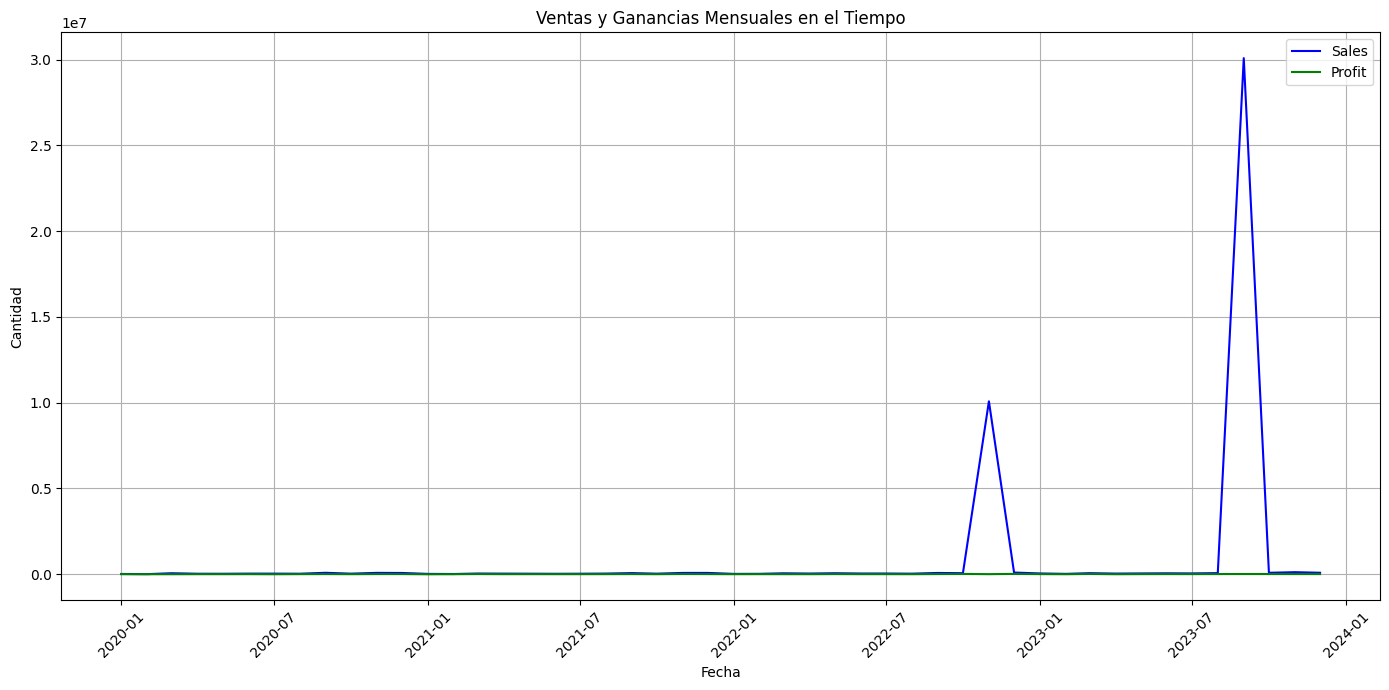

In [27]:
#Análisis de las ventas y las ganancias mensualmente y anualmente

# Agrupamos los datos por año y mes para las ventas y ganancias
monthly_sales_profit = df.groupby(df['Order_Date'].dt.to_period("M"))[['Sales', 'Profit']].sum().reset_index()

# Convertimos la columna 'Order_Date' de regreso a datetime para graficar
monthly_sales_profit['Order_Date'] = monthly_sales_profit['Order_Date'].dt.to_timestamp()

# Grafica
plt.figure(figsize=(14, 7))

# Ventas
plt.plot(monthly_sales_profit['Order_Date'], monthly_sales_profit['Sales'], label='Sales', color='blue')

# Ganancias
plt.plot(monthly_sales_profit['Order_Date'], monthly_sales_profit['Profit'], label='Profit', color='green')

plt.title('Ventas y Ganancias Mensuales en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

* Tendencia general creciente tanto en ventas como en ganancias (crecimiento positivo del negocio a lo largo del tiempo).
* Picos significativos en las ventas en ciertos puntos, lo que podría indicar temporadas de alta demanda o ventas grandes individuales. 
* Las ganancias, aunque generalmente siguen la tendencia de las ventas, muestran una variabilidad considerable de un mes a otro.

C:\Users\DELL\AppData\Local\Temp\ipykernel_16076\937435723.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Discount', y='Sales', data=discount_groups, palette='coolwarm')
C:\Users\DELL\AppData\Local\Temp\ipykernel_16076\937435723.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Discount', y='Profit', data=discount_groups, palette='coolwarm')


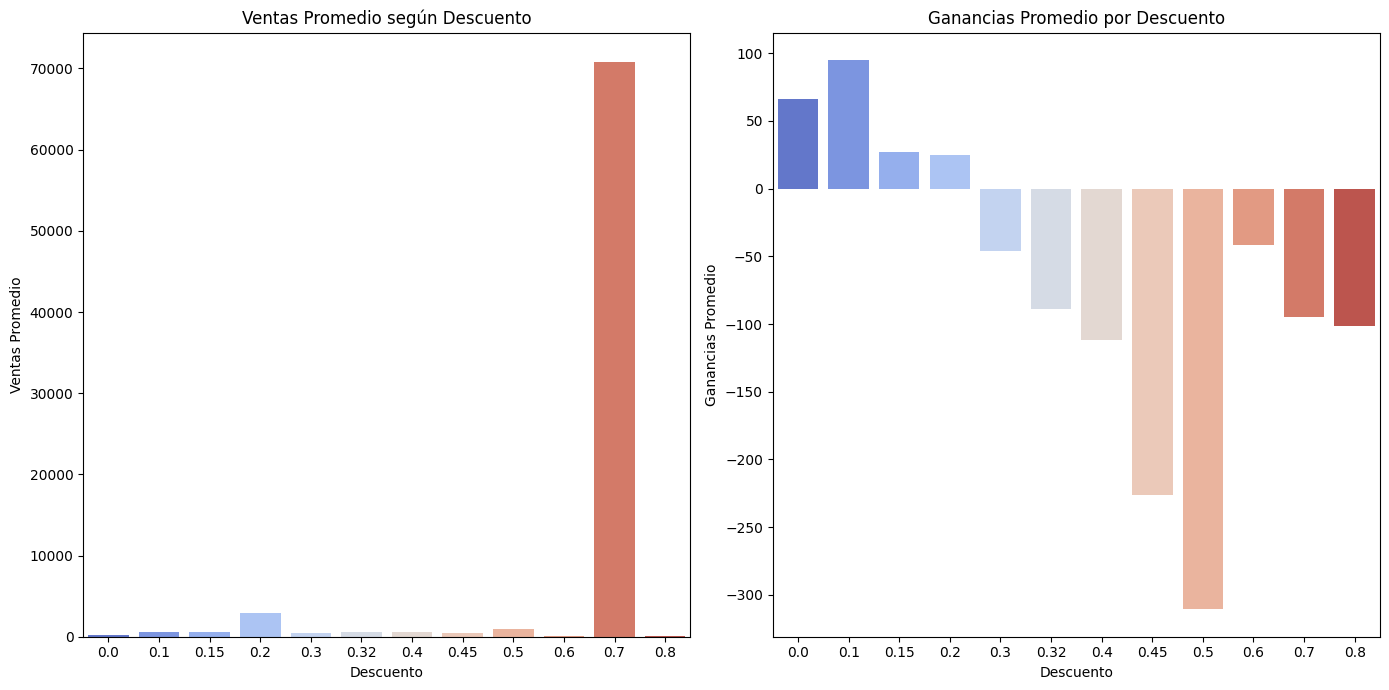

In [28]:
# Impacto de los descuentos en las ventas y ganancias

# Agrupar los datos por nivel de descuento
discount_groups = df.groupby('Discount')[['Sales', 'Profit']].mean().reset_index()

# Graficar
plt.figure(figsize=(14, 7))

# Ventas promedio por nivel de descuento
plt.subplot(1, 2, 1)
sns.barplot(x='Discount', y='Sales', data=discount_groups, palette='coolwarm')
plt.title('Ventas Promedio según Descuento')
plt.xlabel('Descuento')
plt.ylabel('Ventas Promedio')

# Ganancia promedio por nivel de descuento
plt.subplot(1, 2, 2)
sns.barplot(x='Discount', y='Profit', data=discount_groups, palette='coolwarm')
plt.title('Ganancias Promedio por Descuento')
plt.xlabel('Descuento')
plt.ylabel('Ganancias Promedio')

plt.tight_layout()
plt.show()

* Ventas promedio según descuento: Las ventas promedio tienden a ser más altas para ciertos porcentajes de descuento, lo cual sugiere que estos pueden incentivar efectivamente un aumento en las ventas hasta cierto punto. Sin embargo, no hay una correlación directa entre el nivel de descuento y las ventas promedio.

* Ganancia promedio según descuento: La relación entre el nivel de descuento y la ganancia promedio parece ser más negativa en general, ya que mayores descuentos generalmente reducen el margen de ganancia por venta.

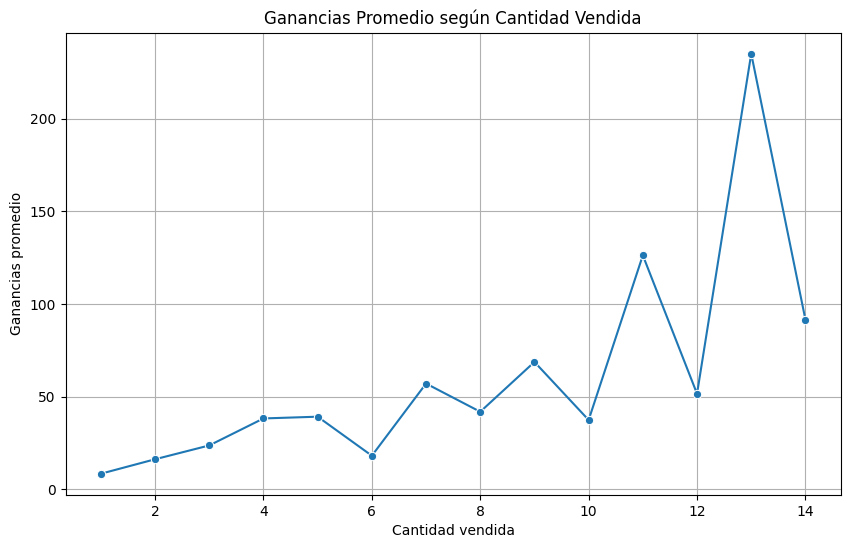

In [29]:
# Analizar ganancias según cantidad vendida

# Agrupar los datos por cantidad y calcular la ganancia promedio para cada cantidad
quantity_profit = df.groupby('Quantity')['Profit'].mean().reset_index()

# Graficar la relación entre cantidad y ganancia promedio
plt.figure(figsize=(10, 6))
sns.lineplot(x='Quantity', y='Profit', data=quantity_profit, marker='o')
plt.title('Ganancias Promedio según Cantidad Vendida')
plt.xlabel('Cantidad vendida')
plt.ylabel('Ganancias promedio')
plt.grid(True)
plt.show()

* La relación entre cantidad y ganancia no es lineal y puede estar influenciada por varios factores como el tipo de producto, el precio unitario, los costos y/o las estrategias de descuento.
* Existe un pico en ganancias promedio cuando la cantidad vendida es alta (alrededor de 13 unidades). Esto podría indicar que las ventas en mayores cantidades podrían estar sujetas a mejores márgenes o condiciones de venta que mejoran la rentabilidad.

### B) Tabla "Product"

1. Carga de datos

In [30]:
# Cargar datos a un Dataframe
dataset_path = "202403-Summan-PruebaTécnica-AnalistaDatos.xlsx"
df_product = pd.read_excel(dataset_path, sheet_name= "Product")

df_product.head()

,Product_ID,Category,Sub-Category,Product_Name
0,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form..."
1,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs
2,OFF-LA-10003223,Office Supplies,Labels,Avery 508
3,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving
4,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...


2. Exploración inicial

In [31]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product_ID    1894 non-null   object
 1   Category      1894 non-null   object
 2   Sub-Category  1894 non-null   object
 3   Product_Name  1894 non-null   object
dtypes: object(4)
memory usage: 59.3+ KB


* El dataset tiene 4 columnas, 1894 filas
* No hay valores nulos
* No hay que cambiar el formato de los datos 

In [32]:
# Chequear si hay duplicados
print("Filas duplicadas:", df_product.duplicated().sum())

Filas duplicadas: 0


* No hay duplicados
* Al no haber datos numéricos, no se hace identificación de outliers ni el análisis descriptivo

### C) Tabla "Customer"

1. Carga de datos

In [33]:
# Cargar datos a un Dataframe
dataset_path = "202403-Summan-PruebaTécnica-AnalistaDatos.xlsx"
df_customer = pd.read_excel(dataset_path, sheet_name= "Customer")

df_customer.head()

,Customer_ID,Customer_Name,monthly_salary,age,marital_status [1:married/ 0:Single],credit score
0,AA-10315,Alex Avila,6349,32,1,500
1,AA-10375,Allen Armold,5374,26,0,630
2,AA-10480,Andrew Allen,9611,44,1,780
3,AA-10645,Anna Andreadi,7025,43,1,450
4,AB-10015,Aaron Bergman,3331,28,1,490


2. Exploración inicial

In [34]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Customer_ID                           804 non-null    object
 1   Customer_Name                         804 non-null    object
 2   monthly_salary                        804 non-null    object
 3   age                                   804 non-null    int64 
 4   marital_status [1:married/ 0:Single]  804 non-null    object
 5   credit score                          804 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 37.8+ KB


* El dataset tiene 6 columnas y 804 filas
* No hay valores nulos
* La columna "monthly_salary" no se reconoció como dato numérico, lo que puede significar que hay uno o varios datos de otro tipo
* La columna "marital_status" no se reconoció como dato numérico, lo que puede significar que hay uno o varios datos de otro tipo


3. Limpieza de datos

In [35]:
#Chequeo de duplicados
print("Filas duplicadas:", df_customer.duplicated().sum())

Filas duplicadas: 0


In [36]:
# Revisión columna "monthly_salary"
print("Valores unicos:", df_customer["monthly_salary"].unique())

Valores unicos: [6349 5374 9611 7025 3331 8511 7199 7838 6957 8601 4338 7262 3924 3157
 4903 4505 2101 9892 2676 4242 2166 8311 8500 8893 3625 5443 2259 6300
 6721 6731 3177 4014 3191 5759 9727 2696 3935 2853 9281 9559 9915 5945
 7165 8444 8034 8795 6865 7486 2982 7255 7195 7472 6855 7293 7619 9563
 8295 6944 4481 4493 6343 9983 4876 3952 8339 4310 8361 7626 8553 2093
 8059 3608 4351 4982 5704 2121 7876 8699 4036 5392 4974 9083 8390 8937
 2344 6206 6172 8502 3370 6234 2307 6609 5495 4392 9465 9111 7685 7238
 5455 9565 5603 9568 9649 9558 8104 8042 5513 3906 2007 6215 4411 3130
 9945 6767 5967 2212 5046 7553 9857 7503 5245 5128 5635 9244 8382 3188
 2350 8582 2081 7895 6194 3614 8136 2866 5708 8656 9639 9584 9908 6582
 2067 7142 8931 7749 6193 7200 7640 5819 9525 2339 3479 2509 5842 6973
 4037 4006 3335 2642 4569 5660 7454 6367 'x' 4537 6637 4722 4489 6031 5315
 5483 7577 4233 3673 5038 6089 9730 3496 8723 5032 7128 5969 7688 2463
 9198 3292 8572 9932 4576 6524 4352 8203 7493 2231 7700 3

In [37]:
# Se observa que hay un dato no numérico 'x'
# Procedemos a reemplazarlo con la mediana de los salarios
df_customer["monthly_salary"] = df_customer["monthly_salary"].replace("x", np.nan)

media_salario = df_customer["monthly_salary"].mean()
mediana_salario = df_customer["monthly_salary"].median()
print("Media salario:", media_salario)
print("Mediana salario:", mediana_salario)

df_customer["monthly_salary"] = df_customer["monthly_salary"].fillna(mediana_salario)

Media salario: 6029.302615193026
Mediana salario: 6067.0


C:\Users\DELL\AppData\Local\Temp\ipykernel_16076\1228914008.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_customer["monthly_salary"] = df_customer["monthly_salary"].replace("x", np.nan)


In [38]:
# Revision columna "marital_status"
print("Valores unicos en columa marital_status:", df_customer["marital_status [1:married/ 0:Single]"].unique())

Valores unicos en columa marital_status: [1 0 'f' 'x' 'mm']


* Solo deberían haber dos opciones de datos: 1 o 0
* Por la naturaleza de la columna, se procede a eliminar aquellas filas que no tienen 0 o 1

In [39]:
df_customer_filtrado = df_customer[df_customer["marital_status [1:married/ 0:Single]"].astype(str).isin(['0', '1'])]
print("Valores unicos en columa marital_status:", df_customer_filtrado["marital_status [1:married/ 0:Single]"].unique())

Valores unicos en columa marital_status: [1 0]


4. Estadística descriptiva

In [40]:
df_customer_filtrado.describe()

,monthly_salary,age,credit score
count,799.000000,799.000000,799.000000
mean,6030.841051,38.381727,557.534418
std,2297.359237,10.918275,148.950560
min,2005.000000,26.000000,300.000000
25%,4203.000000,32.000000,420.000000
50%,6067.000000,38.000000,560.000000
75%,7966.000000,44.000000,690.000000
max,10000.000000,260.000000,800.000000


* El valor máximo de la columna "Age" es 260, lo cual es un error

In [41]:
# Revisión columna "age"
print("Valores unicos en columa Age:", df_customer_filtrado["age"].unique())
mediana_edad = df_customer_filtrado["age"].median()
print("Mediana edad:", mediana_edad)

Valores unicos en columa Age: [ 32  26  44  43  28  41  47  50  35  36  42  27  31  30  49  34  45  48
  46  39  33  38  37  29  40 115 260]
Mediana edad: 38.0


In [42]:
#Procedemos a reemplazar dicho dato erroneo
df_customer_filtrado.loc[df_customer_filtrado["age"] == 260, "age"] = mediana_edad
print("Valores unicos en columa Age:", df_customer_filtrado["age"].unique())

Valores unicos en columa Age: [ 32  26  44  43  28  41  47  50  35  36  42  27  31  30  49  34  45  48
  46  39  33  38  37  29  40 115]


In [43]:
df_customer_filtrado.describe()

,monthly_salary,age,credit score
count,799.000000,799.000000,799.000000
mean,6030.841051,38.103880,557.534418
std,2297.359237,7.588441,148.950560
min,2005.000000,26.000000,300.000000
25%,4203.000000,32.000000,420.000000
50%,6067.000000,38.000000,560.000000
75%,7966.000000,44.000000,690.000000
max,10000.000000,115.000000,800.000000


### D) Tabla "Regional_Manager"

1. Carga de datos

In [44]:
# Cargar datos a un Dataframe
dataset_path = "202403-Summan-PruebaTécnica-AnalistaDatos.xlsx"
df_manager = pd.read_excel(dataset_path, sheet_name = "Regional_Manager")

df_manager.head()

,Regional_Manager,Region
0,Sadie Pawthorne,Wes t
1,Chuck Magee,east
2,Roxanne Rodriguez,cenntral
3,Fred Suzuki,south


2. Exploración inicial

In [45]:
df_manager.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Regional_Manager  4 non-null      object
 1   Region            4 non-null      object
dtypes: object(2)
memory usage: 196.0+ bytes


In [46]:
# El unico error a corregir es la palabra "West" que tiene un espacio e inicial mayuscula cuando los demas datos no
df_manager.loc[df_manager["Region"] == "Wes t", "Region"] = "west"
df_manager.head()

,Regional_Manager,Region
0,Sadie Pawthorne,west
1,Chuck Magee,east
2,Roxanne Rodriguez,cenntral
3,Fred Suzuki,south


### E) Tabla "Returns"

1. Carga de datos

In [47]:
# Cargar datos a un Dataframe
dataset_path = "202403-Summan-PruebaTécnica-AnalistaDatos.xlsx"
df_returns = pd.read_excel(dataset_path, sheet_name = "Returns")

df_returns.head()

,Returned,Order_ID
0,Yes,US-2020-100762
1,Yes,US-2020-100762
2,Yes,US-2020-100762
3,Yes,US-2020-100762
4,Yes,US-2020-100867


2. Exploracion inicial

In [48]:
df_returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Returned  800 non-null    object
 1   Order_ID  800 non-null    object
dtypes: object(2)
memory usage: 12.6+ KB


* No hat valores nulos
* Las dos columnas son tipo cadena
* No se hace análisis estadistico

In [49]:
# Se chequea que la columna "Returned" contenga solo el valor "Yes"
print("Valores unicos en columa Returned:", df_returns["Returned"].unique())


Valores unicos en columa Returned: ['Yes']


### F) Exportación de los dataframes a nuevo archivo excel

In [50]:
# Exportamos los DataFrames a un nuevo archivo Excel que contendrá las mismas tablas pero despues de la limpieza
with pd.ExcelWriter("Cleaned_Dataset.xlsx", engine='xlsxwriter') as writer:
    df.to_excel(writer, sheet_name = "Sales", index = False)
    df_product.to_excel(writer, sheet_name = "Product", index = False)
    df_customer_filtrado.to_excel(writer, sheet_name = "Customer", index = False)
    df_manager.to_excel(writer, sheet_name = "Regional_Manager", index = False)
    df_returns.to_excel(writer, sheet_name = "Returns", index = False)